# 4.10 Coding Etiquette & Excel Reporting

## This script contains the following:

### 1) Import libraries and visualizations

### 2) Import data set

### 3) Data Quality

### 4) Security Implications

### 5) Creating a regional segmentation of the data

### 6) Determining whether there’s a difference in spending habits between the different U.S. regions

### 7) Creating an exclusion flag for low-activity customers

### 8) Creating profiling variables

### 9) Creating visualizations to show the distribution of profiles

### 10) Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### 11) Comparing the customer profiles with regions and departments

# 01. Import libraries and visualizations
## Q1

In [1]:
# import libraries and visualizations
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import data

In [2]:
# path folder
path = r'C:\\Users\alexp\Instacart Basket Analysis'
path

'C:\\\\Users\\alexp\\Instacart Basket Analysis'

In [3]:
# import orders_products_customers_merged_2.pkl
orders_products_customers_merged_2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_2.pkl'))

# 03. Data Quality

In [4]:
# finding the outliers of the 'prices' column
orders_products_customers_merged_2.loc[orders_products_customers_merged_2['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular customer,NaN,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [5]:
# assign missing values with NaNs
orders_products_customers_merged_2.loc[orders_products_customers_merged_2['prices'] >100, 'prices'] = np.nan

In [6]:
# run max value to check whether the replacement was successful
orders_products_customers_merged_2['prices'].max()

25.0

# 04. Security implications
## Q2

In [7]:
# print information about orders_products_customers_merged_2 dataframe
orders_products_customers_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                object  
 1   user_id                 object  
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              int32   
 7   add_to_cart_order       int32   
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int8    
 11  department_id           int32   
 12  prices                  float32 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int8    
 19  loyalty_flag            object  
 20  max_spender             float16 
 21  spendi

In [8]:
# print first 5 rows of the orders_products_customers_merged_2 dataframe
orders_products_customers_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### There are personally identifiable information in the orders_products_customers_merged_2 dataframe (first and last name) that directly identifies an individual. Safeguarding sensitive information is critical and it should be the responsibility of the individual user to protect data to which they have access and adhere to security policies. While income does not constitute PII, this information could be used when linked to the first and last name to identify a specific customer.

#  Create a regional segmentation of the data
## Q3

In [9]:
# print the frequency of the 'state' column
orders_products_customers_merged_2['state'].value_counts(dropna = False).sort_index()

Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
New York

In [10]:
# create region column using for-loops function
result = []

for value in orders_products_customers_merged_2 ["state"]:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append("Northeast")
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append("Midwest")
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append("West")
    else:
        result.append("South")

In [11]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [12]:
orders_products_customers_merged_2['region'] = result

In [13]:
# Print frequency of region column
orders_products_customers_merged_2['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
orders_products_customers_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,ordering_behavior,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid range product,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


# Determine whether there’s a difference in spending habits between the different U.S. regions

In [16]:
# Use crosstab function for 'region' and 'spending_flag' column
crosstab_spending_flag = pd.crosstab(orders_products_customers_merged_2['region'], orders_products_customers_merged_2['spending_flag'], dropna = False)
crosstab_spending_flag

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


### There are more low spenders than high spenders for each region.

# Create an exclusion flag for low-activity customers

## Q4

In [17]:
# create exclusion flag using loc() function
orders_products_customers_merged_2.loc[orders_products_customers_merged_2['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [18]:
orders_products_customers_merged_2.loc[orders_products_customers_merged_2['max_order'] >= 5, 'activity_flag'] = 'High activity'

In [19]:
orders_products_customers_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,ordering_behavior,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid range product,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


In [20]:
# find the frequency of 'activity_flag' column
orders_products_customers_merged_2['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [21]:
# create a subset for 'high activity'
high_activity_customers = orders_products_customers_merged_2[orders_products_customers_merged_2['activity_flag'] == 'High activity']

In [22]:
high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,ordering_behavior,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid range product,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


## Q5

## Create a profiling variables

### Age

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
orders_products_customers_merged_2['age'].value_counts(dropna = False).sort_index()

18    500474
19    519606
20    502848
21    512527
22    513853
23    514631
24    509062
25    472188
26    512813
27    524318
28    487863
29    520258
30    508918
31    528551
32    497903
33    494499
34    507343
35    518764
36    483812
37    510551
38    515262
39    508148
40    505854
41    475225
42    506776
43    522239
44    515798
45    511241
46    494160
47    516856
48    529728
49    531360
50    488796
51    514941
52    502251
53    501591
54    520202
55    511489
56    522488
57    497330
58    502589
59    502498
60    484416
61    487900
62    495969
63    495877
64    528009
65    486983
66    476219
67    494257
68    524316
69    513318
70    501821
71    485844
72    502673
73    521003
74    498567
75    520056
76    498324
77    502120
78    495311
79    529742
80    515246
81    509284
Name: age, dtype: int64

### 18 - 39: Young Adult
### 40 - 64: Middle Age
### 65 + : Elderly 

In [25]:
# create 'age_group' column using loc() function
orders_products_customers_merged_2.loc[(orders_products_customers_merged_2['age'] >= 18) & (orders_products_customers_merged_2['age'] <= 39), 'age_group'] = 'Young Adult'

In [26]:
orders_products_customers_merged_2.loc[(orders_products_customers_merged_2['age'] >= 40) & (orders_products_customers_merged_2['age'] <= 64), 'age_group'] = 'Middle Age'

In [27]:
orders_products_customers_merged_2.loc[(orders_products_customers_merged_2['age'] >= 65), 'age_group'] = 'Elderly'

In [28]:
# find frequency of 'age_group' column
orders_products_customers_merged_2['age_group'].value_counts(dropna = False)

Middle Age     12665583
Young Adult    11164192
Elderly         8575084
Name: age_group, dtype: int64

In [29]:
orders_products_customers_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,ordering_behavior,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid range product,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult


### Income

In [30]:
orders_products_customers_merged_2['income'].value_counts(dropna = False)

72344     4395
112610    4282
57501     4136
115620    3891
36163     3657
97928     3448
125077    3416
94497     3396
99954     3392
50556     3223
118872    3218
105378    3207
152166    3204
97402     3192
52769     3117
72170     3105
113016    3081
82853     3072
109407    3038
164011    3036
55237     3019
96505     2992
70584     2989
108453    2964
57242     2948
117606    2939
39830     2937
138180    2921
141212    2906
65240     2902
109599    2879
41914     2876
98333     2870
92898     2864
62804     2863
99155     2859
100426    2853
96918     2840
63243     2839
88471     2833
38077     2828
143713    2805
66145     2801
92162     2798
118816    2747
41299     2746
64258     2741
110936    2741
93689     2721
85676     2717
63330     2715
54014     2715
111228    2704
95710     2698
57256     2697
67477     2689
145129    2688
73495     2684
103157    2654
154809    2651
120977    2632
68848     2608
37788     2596
99018     2590
114171    2590
128467    2589
62963     

### <52,000: Low income
### 52,000 - 156,000: Middle income
### >156,000: High income

In [31]:
# create 'economic_class' column using loc() function
orders_products_customers_merged_2.loc[(orders_products_customers_merged_2['income'] < 52000), 'economic_class'] = 'Low income'

In [32]:
orders_products_customers_merged_2.loc[(orders_products_customers_merged_2['income'] >= 52000) & (orders_products_customers_merged_2['income'] <= 156000), 'economic_class'] = 'Middle income'

In [33]:
orders_products_customers_merged_2.loc[(orders_products_customers_merged_2['income'] > 156000), 'economic_class'] = 'High income'

In [34]:
# find frequency of 'economic_class' column
orders_products_customers_merged_2['economic_class'].value_counts(dropna = False)

Middle income    25573795
Low income        3879453
High income       2951611
Name: economic_class, dtype: int64

In [35]:
orders_products_customers_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,ordering_behavior,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_group,economic_class
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid range product,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income


### Number of dependents

In [36]:
orders_products_customers_merged_2['number_of_dependents'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: number_of_dependents, dtype: int64

### 0: No dependents
### 1-3: Dependents

In [37]:
# create 'dependents_flag' column using loc() function
orders_products_customers_merged_2.loc[(orders_products_customers_merged_2['number_of_dependents'] == 0), 'dependents_flag'] = 'No dependents'

In [38]:
orders_products_customers_merged_2.loc[(orders_products_customers_merged_2['number_of_dependents'] >= 1) & (orders_products_customers_merged_2['number_of_dependents'] <= 3), 'dependents_flag'] = 'Dependents'

In [39]:
# find frequency of 'dependents_flag' column
orders_products_customers_merged_2['dependents_flag'].value_counts(dropna = False)

Dependents       24307356
No dependents     8097503
Name: dependents_flag, dtype: int64

In [40]:
orders_products_customers_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,ordering_behavior,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_group,economic_class,dependents_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid range product,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income,Dependents
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income,Dependents
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income,Dependents
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income,Dependents
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income,Dependents


### Department ID

In [41]:
# Import data set 'departments_wrangled.csv'
df_dep_t_new = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = 0)

In [42]:
df_dep_t_new

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [43]:
# create region column using for-loops function
result = []

for value in orders_products_customers_merged_2 ["department_id"]:
    if value == 1:
        result.append("frozen")
    elif value == 2:
        result.append("other")
    elif value == 3:
        result.append("bakery")
    elif value == 4:
        result.append("produce")
    elif value == 5:
        result.append("alcohol")
    elif value == 6:
        result.append("international")
    elif value == 7:
        result.append("beverages")
    elif value == 8:
        result.append("pets")
    elif value == 9:
        result.append("dry goods pasta")
    elif value == 10:
        result.append("bulk")
    elif value == 11:
        result.append("personal care")
    elif value == 12:
        result.append("meat seafood")
    elif value == 13:
        result.append("pantry")
    elif value == 14:
        result.append("breakfast")
    elif value == 15:
        result.append("canned goods")
    elif value == 16:
        result.append("dairy eggs")
    elif value == 17:
        result.append("household")
    elif value == 18:
        result.append("babies")
    elif value == 19:
        result.append("snacks")
    elif value == 20:
        result.append("deli")
    elif value == 21:
        result.append("missing")

In [44]:
result

['beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'dairy eggs',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'household',
 'household',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'produce',
 'produce',
 'breakfast',
 'breakfast',
 'breakfast',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'pantry',
 'produce',
 'produce',
 'produce',
 'beverages',
 'beverages',
 'beverages',
 'dairy eggs',
 'dairy eggs',
 'snacks',
 'dairy eggs',
 'dairy eggs',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'sna

In [45]:
orders_products_customers_merged_2['department_category'] = result

In [46]:
# Print frequency of department_category column
orders_products_customers_merged_2['department_category'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_category, dtype: int64

In [47]:
orders_products_customers_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,ordering_behavior,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_group,economic_class,dependents_flag,department_category
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid range product,Regularly busy,Regular days,Average orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income,Dependents,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income,Dependents,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income,Dependents,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Fewest orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income,Dependents,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busy,Slowest days,Most orders,10,New customer,6.367188,Low spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young Adult,Low income,Dependents,beverages


### Family status

In [48]:
orders_products_customers_merged_2['family_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: family_status, dtype: int64

## Q6
## Create visualizations to show the distribution of profiles

### Age

(array([0, 1, 2]),
 [Text(0, 0, 'Middle Age'), Text(1, 0, 'Young Adult'), Text(2, 0, 'Elderly')])

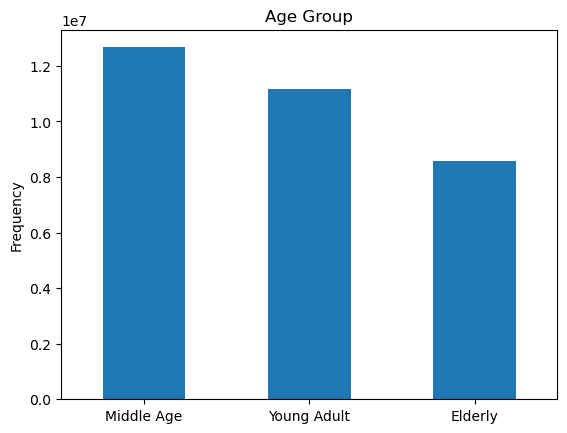

In [49]:
# create a bar chart for 'age_group' column
bar_chart_age_group = orders_products_customers_merged_2['age_group'].value_counts().plot.bar()
plt.title("Age Group")
plt.ylabel("Frequency")
plt.xticks(rotation='horizontal')

### Income

(array([0, 1, 2]),
 [Text(0, 0, 'Middle income'),
  Text(1, 0, 'Low income'),
  Text(2, 0, 'High income')])

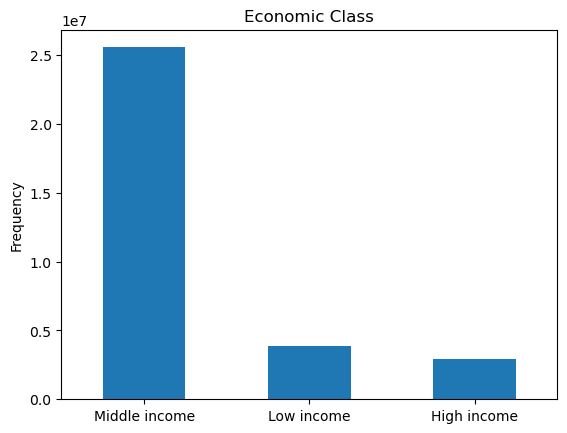

In [50]:
# create a bar chart for 'economic_class' column
bar_chart_economic_class = orders_products_customers_merged_2['economic_class'].value_counts().plot.bar()
plt.title("Economic Class")
plt.ylabel("Frequency")
plt.xticks(rotation='horizontal')

### Number of Dependents

(array([0, 1]), [Text(0, 0, 'Dependents'), Text(1, 0, 'No dependents')])

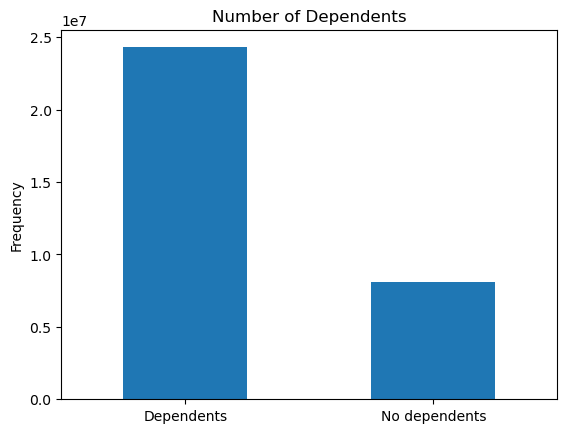

In [51]:
# create a bar chart for 'dependents_flag' column
bar_chart_dependents = orders_products_customers_merged_2['dependents_flag'].value_counts().plot.bar()
plt.title("Number of Dependents")
plt.ylabel("Frequency")
plt.xticks(rotation='horizontal')

### Family status

(array([0, 1, 2, 3]),
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'divorced/widowed'),
  Text(3, 0, 'living with parents and siblings')])

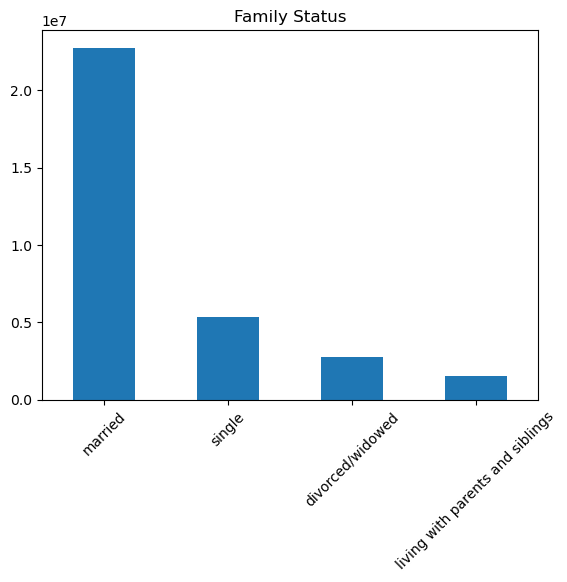

In [52]:
# create a bar chart for 'family_status' column
bar_chart_fam = orders_products_customers_merged_2['family_status'].value_counts().plot.bar()
plt.title("Family Status")
plt.xticks(rotation='45')

### Department ID

Text(0.5, 0, 'Frequency')

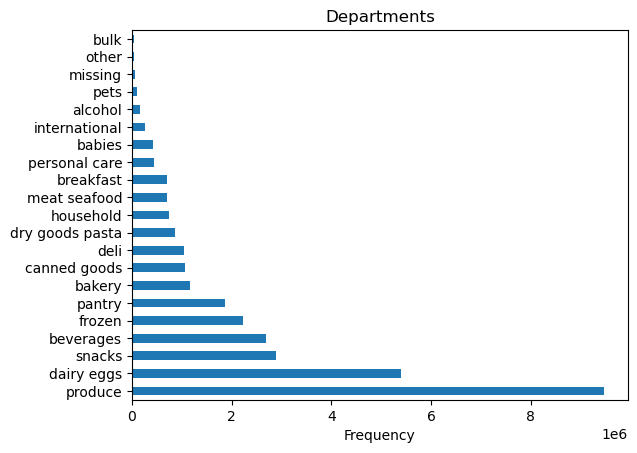

In [53]:
# create a bar chart for 'department_category' column
bar_chart_department_category = orders_products_customers_merged_2['department_category'].value_counts().plot.barh()
plt.title("Departments")
plt.xlabel("Frequency")

### Family status and orders_day_of_week

In [54]:
# Use crosstab function for 'family_status' and 'orders_day_of_week' column
crosstab_odow_family_status = pd.crosstab(orders_products_customers_merged_2['orders_day_of_week'], orders_products_customers_merged_2['family_status'], dropna = False)
crosstab_odow_family_status

family_status,divorced/widowed,living with parents and siblings,married,single
orders_day_of_week,,,,
0,528715,295224,4358649,1021594
1,481073,271393,3964070,943694
2,359611,201511,2963190,689518
3,330662,182315,2698866,628691
4,321051,180794,2657803,624154
5,364215,203203,2945443,692930
6,386485,216163,3168732,725110


Text(0.5, 0, 'Orders Day of Week')

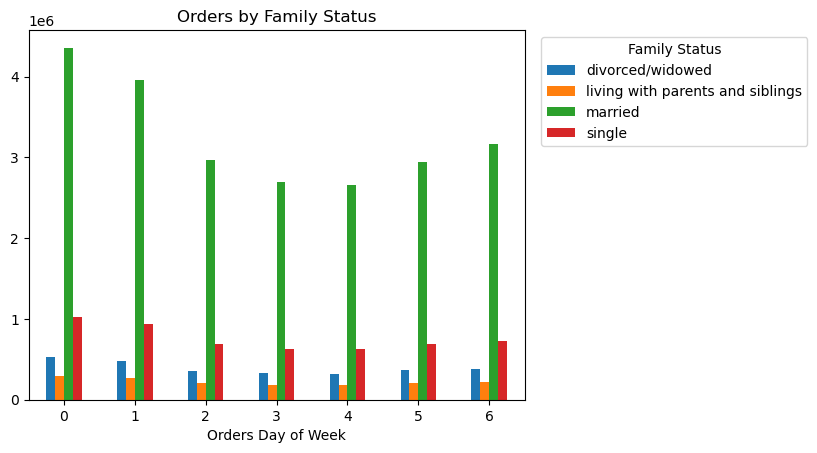

In [55]:
# create a bar chart for crosstab_odow_family_status
bar_chart_family_status = crosstab_odow_family_status.plot(kind="bar", rot=0)
plt.legend(title = 'Family Status', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("Orders by Family Status")
plt.xlabel("Orders Day of Week")

### Region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

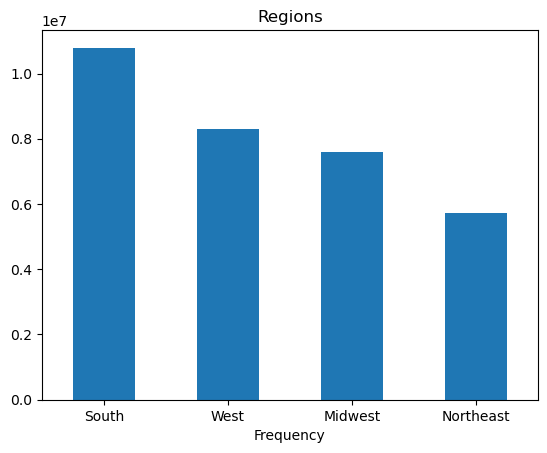

In [56]:
# create a bar chart for 'region' column
bar_chart_region = orders_products_customers_merged_2['region'].value_counts().plot.bar()
plt.title("Regions")
plt.xlabel("Frequency")
plt.xticks(rotation='horizontal')

### Spending habits between the different U.S. regions¶

Text(0.5, 0, 'Region')

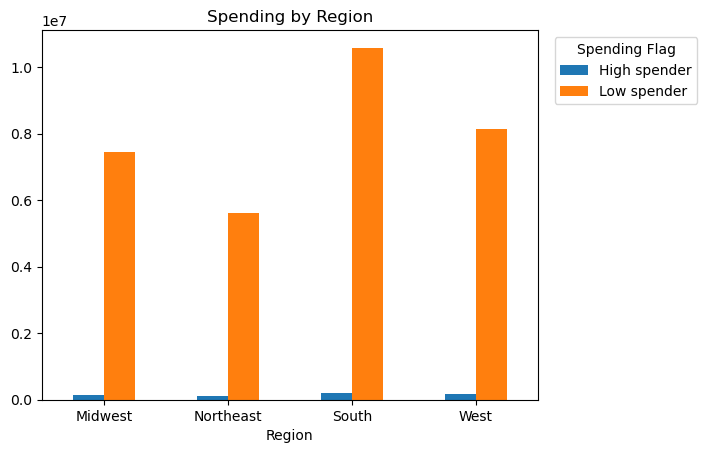

In [57]:
# create bar chart for crosstab_spending_flag
bar_chart_spending_region = crosstab_spending_flag.plot(kind="bar", rot=0)
plt.legend(title = 'Spending Flag', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("Spending by Region")
plt.xlabel("Region")

In [58]:
# Use crosstab function for 'loyalty_flag' and 'orders_day_of_week' column
crosstab_odow_loyalty = pd.crosstab(orders_products_customers_merged_2['orders_day_of_week'], orders_products_customers_merged_2['loyalty_flag'], dropna = False)
crosstab_odow_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,1280451,3169000
1,1843401,1067446,2749383
2,1352343,814412,2047075
3,1266495,731417,1842622
4,1292042,694739,1797021
5,1456715,759780,1989296
6,1318366,895745,2282379


Text(0.5, 0, 'Orders Day of Week')

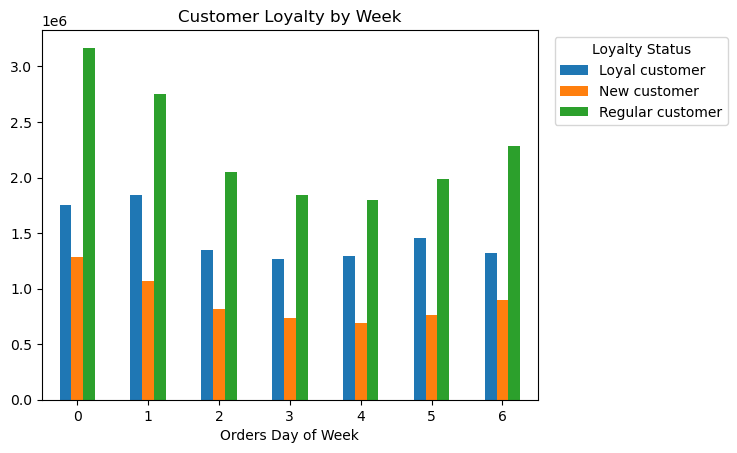

In [59]:
# create bar chart for crosstab_odow_loyalty
bar_chart_odow_loyalty = crosstab_odow_loyalty.plot(kind="bar", rot=0)
plt.legend(title = 'Loyalty Status', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("Customer Loyalty by Week")
plt.xlabel("Orders Day of Week")

In [60]:
# Use crosstab function for 'loyalty_flag' and 'order_hour_of_day' column
crosstab_ohod_loyalty = pd.crosstab(orders_products_customers_merged_2['order_hour_of_day'], orders_products_customers_merged_2['loyalty_flag'], dropna = False)
crosstab_ohod_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,46038,110983
1,30179,26753,58768
2,17788,15925,35662
3,13374,11995,25912
4,16882,10921,25439
5,29350,16018,42593
6,112865,43381,134247
7,346694,130011,414349
8,643895,267132,807091


Text(0.5, 0, 'Order Hour of Day')

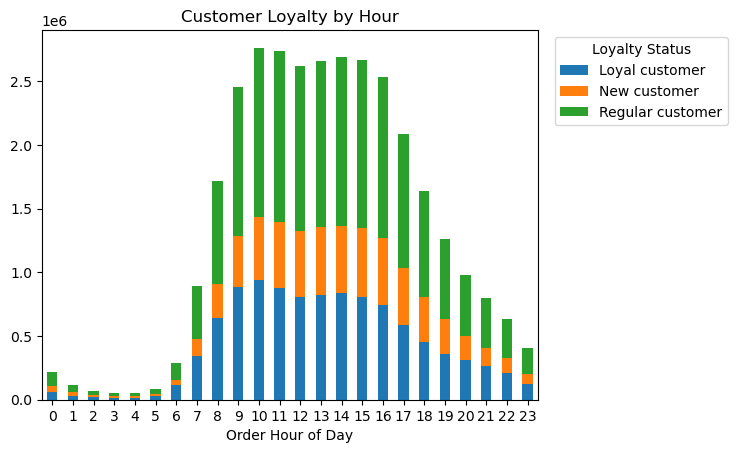

In [61]:
# create bar chart for crosstab_ohod_loyalty
bar_chart_ohod_loyalty = crosstab_ohod_loyalty.plot(kind="bar", rot = 0, stacked = True)
plt.legend(title = 'Loyalty Status', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("Customer Loyalty by Hour")
plt.xlabel("Order Hour of Day")

In [62]:
# Use crosstab function for 'age_group' and 'orders_day_of_week' column
crosstab_odow_age_group = pd.crosstab(orders_products_customers_merged_2['orders_day_of_week'], orders_products_customers_merged_2['age_group'], dropna = False)
crosstab_odow_age_group

age_group,Elderly,Middle Age,Young Adult
orders_day_of_week,,,
0,1643234,2415602,2145346
1,1483125,2209950,1967155
2,1114364,1657020,1442446
3,1022963,1498798,1318773
4,998222,1477270,1308310
5,1113361,1643124,1449306
6,1199815,1763819,1532856


Text(0.5, 0, 'Orders Day of Week')

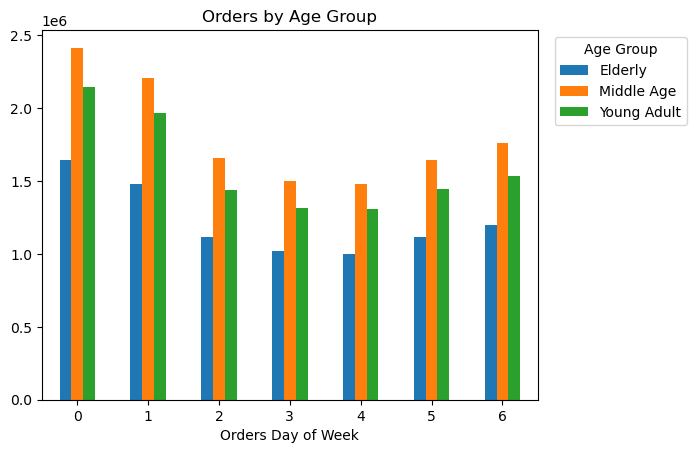

In [63]:
# create a bar chart for crosstab_odow_family_status
bar_chart_odow_age = crosstab_odow_age_group.plot(kind="bar", rot=0)
plt.legend(title = 'Age Group', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("Orders by Age Group")
plt.xlabel("Orders Day of Week")

## Q7

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### Age

In [64]:
# aggregate the min, mean, and max for 'age_group' and 'days_since_prior_order'
orders_products_customers_merged_2.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Elderly                  11.078125  0.0  30.0
Middle Age               11.117188  0.0  30.0
Young Adult              11.109375  0.0  30.0

In [65]:
# aggregate the min, mean, and max for 'age_group' and 'prices'
orders_products_customers_merged_2.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Elderly      7.796546  1.0  25.0
Middle Age   7.791837  1.0  25.0
Young Adult  7.785774  1.0  25.0

### Income

In [66]:
# aggregate the min, mean, and max for 'economic_class' and 'days_since_prior_order'
orders_products_customers_merged_2.groupby('economic_class').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
economic_class                                  
High income                 10.914062  0.0  30.0
Low income                  11.570312  0.0  30.0
Middle income               11.054688  0.0  30.0

In [67]:
# aggregate the min, mean, and max for 'economic_class' and 'prices'
orders_products_customers_merged_2.groupby('economic_class').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
economic_class                     
High income     7.943681  1.0  25.0
Low income      6.741191  1.0  25.0
Middle income   7.932653  1.0  25.0

### Number of Dependents

In [68]:
# aggregate the min, mean, and max for 'dependents_flag' and 'days_since_prior_order'
orders_products_customers_merged_2.groupby('dependents_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
dependents_flag                                  
Dependents                   11.109375  0.0  30.0
No dependents                11.078125  0.0  30.0

In [69]:
# aggregate the min, mean, and max for 'dependents_flag' and 'prices'
orders_products_customers_merged_2.groupby('dependents_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
dependents_flag                     
Dependents       7.791334  1.0  25.0
No dependents    7.789975  1.0  25.0

### Department ID

In [70]:
# aggregate the min, mean, and max for 'department_category' and 'days_since_prior_order'
orders_products_customers_merged_2.groupby('department_category').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                      mean  min   max
department_category                                  
alcohol                          10.343750  0.0  30.0
babies                           10.007812  0.0  30.0
bakery                           11.093750  0.0  30.0
beverages                        11.054688  0.0  30.0
breakfast                        11.296875  0.0  30.0
bulk                             10.101562  0.0  30.0
canned goods                     11.656250  0.0  30.0
dairy eggs                       10.984375  0.0  30.0
deli                             11.343750  0.0  30.0
dry goods pasta                  11.773438  0.0  30.0
frozen                           11.734375  0.0  30.0
household                        12.000000  0.0  30.0
international                    11.289062  0.0  30.0
meat seafood                     11.429688  0.0  30.0
missing                          10.218750  0.0  30.0
other                            10.953125  0.0  30.0
pantry                           11.164062  0.0  30.0
personal care                    11.593750  0.0  30.0
pets                             11.867188  0.0  30.0
produce                          10.859375  0.0  30.0
snacks                           10.945312  0.0  30.0

In [71]:
# aggregate the min, mean, and max for 'department_category' and 'prices'
orders_products_customers_merged_2.groupby('department_category').agg({'prices': ['mean', 'min', 'max']})

prices           
                          mean  min   max
department_category                      
alcohol               8.143702  1.0  15.0
babies                7.638380  1.0  15.0
bakery                7.853809  1.0  15.0
beverages             7.680502  1.0  15.0
breakfast             8.028963  1.0  14.9
bulk                  8.348960  1.4  14.1
canned goods          7.539976  1.0  15.0
dairy eggs            8.335056  1.0  15.0
deli                  7.778701  1.0  15.0
dry goods pasta       7.350283  1.0  15.0
frozen                7.736553  1.0  15.0
household             7.384058  1.0  15.0
international         7.682264  1.0  15.0
meat seafood         16.294443  8.0  25.0
missing               8.660716  1.0  15.0
other                 6.990934  1.1  15.0
pantry                8.009443  1.0  20.0
personal care         7.996769  1.0  15.0
pets                  7.889071  1.0  15.0
produce               7.981708  1.0  15.0
snacks                4.275437  1.6   7.0

# Q8 & Q9

## Compare your customer profiles with regions and departments
## Produce suitable charts to illustrate your results and export them in your project folder

### Age

In [72]:
# Use crosstab function for 'region' and 'age_group' column
crosstab_region_age_group = pd.crosstab(orders_products_customers_merged_2['region'], orders_products_customers_merged_2['age_group'], dropna = False)
crosstab_region_age_group

age_group,Elderly,Middle Age,Young Adult
region,,,
Midwest,1990844,3005352,2601129
Northeast,1553903,2209479,1959354
South,2836257,4179885,3775743
West,2194080,3270867,2827966


Text(0.5, 0, 'Region')

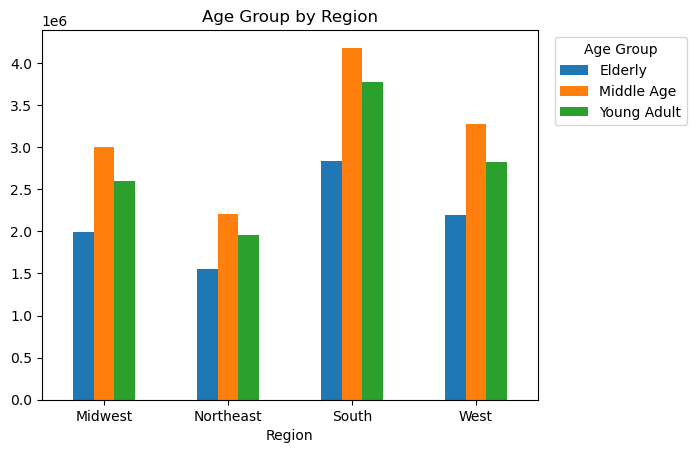

In [73]:
# create bar chart for crosstab_region_age_group
bar_chart_age_group_region = crosstab_region_age_group.plot(kind="bar", rot=0)
plt.legend(title = 'Age Group', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("Age Group by Region")
plt.xlabel("Region")

In [74]:
# Use crosstab function for 'department' and 'age_group' column
crosstab_departments_age_group = pd.crosstab(orders_products_customers_merged_2['department_category'], orders_products_customers_merged_2['age_group'], dropna = False)
crosstab_departments_age_group

age_group,Elderly,Middle Age,Young Adult
department_category,,,
alcohol,39036,59771,54889
babies,109445,167984,146373
bakery,309522,458686,404220
beverages,714832,1059131,914160
breakfast,183844,275947,243242
bulk,9242,13329,12002
canned goods,282438,416382,369238
dairy eggs,1426213,2102456,1870078
deli,277618,411631,362000


Text(0, 0.5, 'Department')

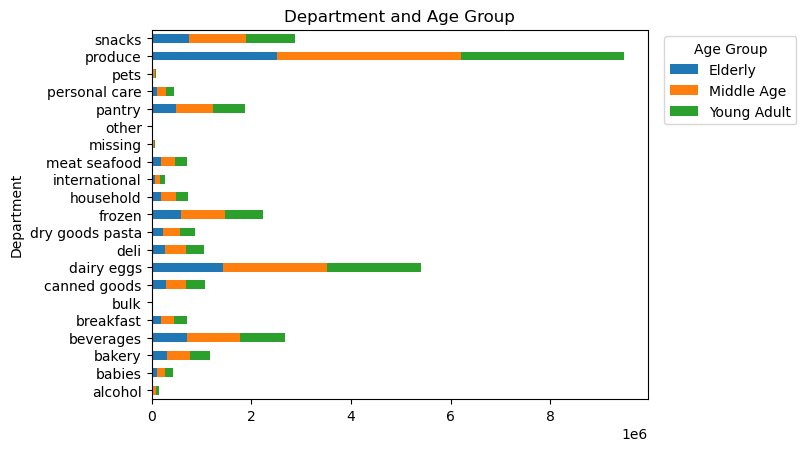

In [75]:
# create stacked bar chart for crosstab_departments_age_group
stacked_bar_chart_department_age_group = crosstab_departments_age_group.plot(kind="barh", stacked = True)
plt.legend(title = 'Age Group', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("Department and Age Group")
plt.ylabel("Department")

### Income

In [76]:
# Use crosstab function for 'region' and 'economic_class' column
crosstab_region_income = pd.crosstab(orders_products_customers_merged_2['region'], orders_products_customers_merged_2['economic_class'], dropna = False)
crosstab_region_income

economic_class,High income,Low income,Middle income
region,,,
Midwest,690909,912447,5993969
Northeast,510271,680729,4531736
South,994497,1315278,8482110
West,755934,970999,6565980


Text(0.5, 0, 'Region')

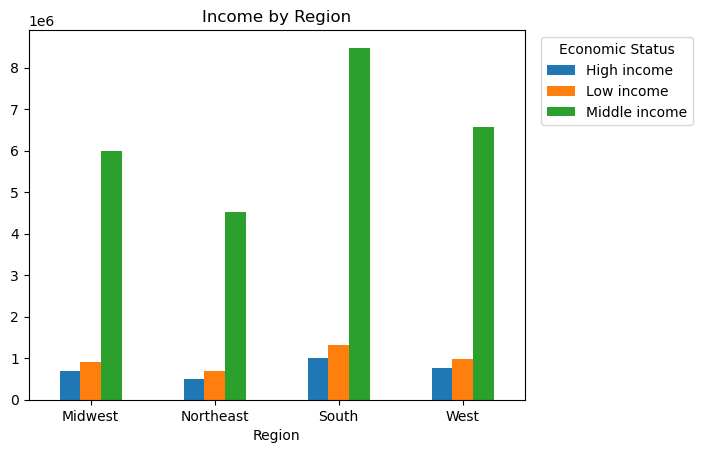

In [77]:
# create bar chart for crosstab_region_income
bar_chart_income_region = crosstab_region_income.plot(kind="bar", rot = 0)
plt.legend(title = 'Economic Status', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("Income by Region")
plt.xlabel("Region")

In [78]:
# Use crosstab function for 'department' and 'economic_class' column
crosstab_department_income = pd.crosstab(orders_products_customers_merged_2['department_category'], orders_products_customers_merged_2['economic_class'], dropna = False)
crosstab_department_income

economic_class,High income,Low income,Middle income
department_category,,,
alcohol,19664,21073,112959
babies,39496,34985,349321
bakery,114454,124419,933555
beverages,239217,431757,2017149
breakfast,62605,104033,536395
bulk,2550,5215,26808
canned goods,101994,94979,871085
dairy eggs,499114,579794,4319839
deli,96000,122828,832421


Text(0, 0.5, 'Department')

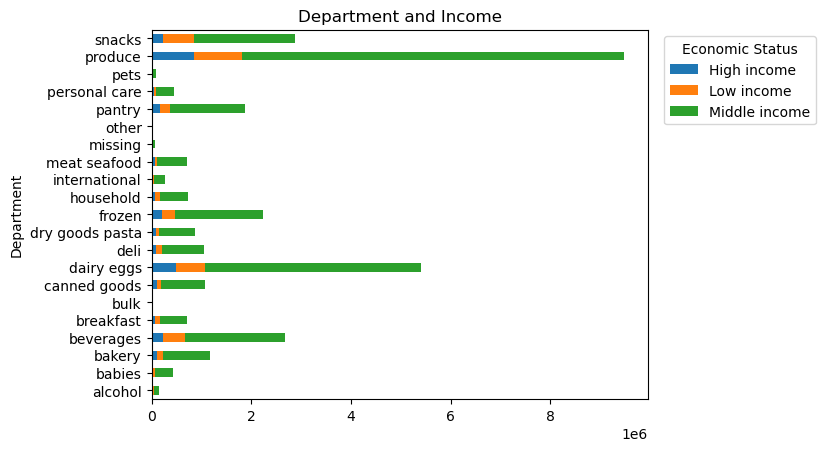

In [79]:
# create bar chart for crosstab_department_income
stacked_bar_chart_department_income = crosstab_department_income.plot(kind="barh", stacked = True)
plt.legend(title = 'Economic Status', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("Department and Income")
plt.ylabel("Department")

### Number of Dependents

In [80]:
# Use crosstab function for 'region' and 'dependents_flag' column
crosstab_region_dependent = pd.crosstab(orders_products_customers_merged_2['region'], orders_products_customers_merged_2['dependents_flag'], dropna = False)
crosstab_region_dependent

dependents_flag,Dependents,No dependents
region,,
Midwest,5692125,1905200
Northeast,4304435,1418301
South,8090226,2701659
West,6220570,2072343


Text(0.5, 0, 'Region')

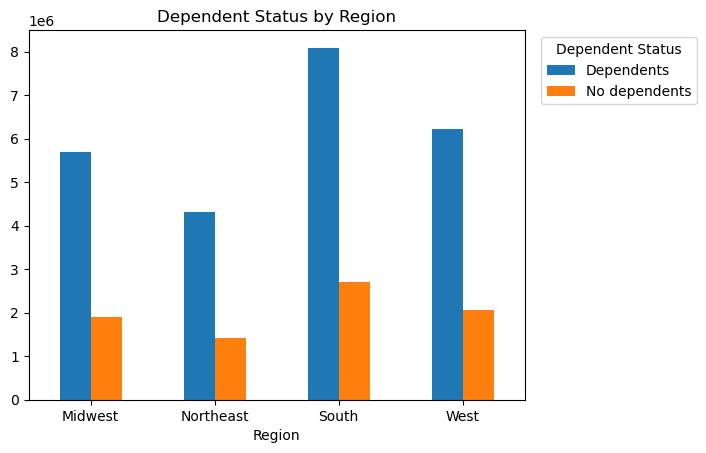

In [81]:
# create bar chart for crosstab_region_dependent
bar_chart_region_dependent = crosstab_region_dependent.plot(kind="bar", rot=0)
plt.legend(title = 'Dependent Status', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("Dependent Status by Region")
plt.xlabel("Region")

In [82]:
# Use crosstab function for 'department' and 'dependents_flag' column
crosstab_department_dependent = pd.crosstab(orders_products_customers_merged_2['department_category'], orders_products_customers_merged_2['dependents_flag'], dropna = False)
crosstab_department_dependent

dependents_flag,Dependents,No dependents
department_category,,
alcohol,114578,39118
babies,317308,106494
bakery,878023,294405
beverages,2013681,674442
breakfast,528456,174577
bulk,26295,8278
canned goods,803220,264838
dairy eggs,4049385,1349362
deli,786104,265145


Text(0, 0.5, 'Department')

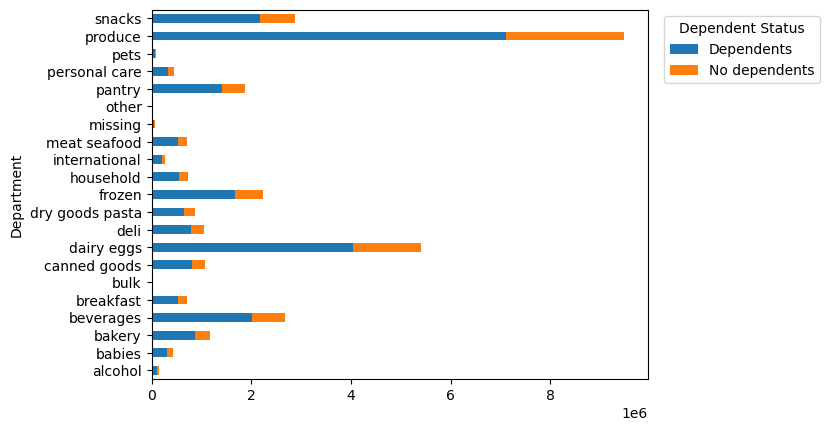

In [83]:
# create bar chart for crosstab_department_dependent
stacked_bar_chart_department_dependent = crosstab_department_dependent.plot(kind="barh", stacked = True)
plt.legend(title = 'Dependent Status', bbox_to_anchor = (1.02,1), loc='upper left')
plt.ylabel("Department")

In [84]:
# Return tuple of number of rows and number of columns orders_products_customers_merged_2 dataframe
orders_products_customers_merged_2.shape

(32404859, 39)

In [85]:
# print information on final orders_products_customers_merged_2 dataframe
orders_products_customers_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 39 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                object  
 1   user_id                 object  
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              int32   
 7   add_to_cart_order       int32   
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int8    
 11  department_id           int32   
 12  prices                  float32 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int8    
 19  loyalty_flag            object  
 20  max_spender             float16 
 21  spendi

# 05. Export data set, sample, and visualizations

In [73]:
# Export high_activity_customers to pkl
high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [79]:
bar_chart_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_age_group.png'))

In [81]:
bar_chart_economic_class.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_economic_class.png'))

In [83]:
bar_chart_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_dependents.png'))

In [85]:
bar_chart_department_category.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_department_category.png'))

In [88]:
bar_chart_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_family_status.png'))

In [90]:
bar_chart_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_region.png'))

In [92]:
bar_chart_spending_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_spending_region.png'))

In [127]:
bar_chart_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_fam.png'))

In [128]:
bar_chart_odow_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_odow_loyalty.png'))

In [129]:
bar_chart_ohod_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_ohod_loyalty.png'))

In [130]:
bar_chart_odow_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_odow_age.png'))

In [94]:
bar_chart_age_group_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_age_group_region.png'))

In [97]:
stacked_bar_chart_department_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_chart_department_age_group.png'))

In [99]:
bar_chart_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_income_region.png'))

In [101]:
stacked_bar_chart_department_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_chart_department_income.png'))

In [103]:
bar_chart_region_dependent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_region_dependent.png'))

In [105]:
stacked_bar_chart_department_dependent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_chart_department_dependent.png'))

In [86]:
orders_products_customers_merged_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_2_all.pkl'))